In [13]:
import numpy as np
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import matplotlib.pyplot as pt
import seaborn as sns


In [14]:

obs = np.array([17,42,26,22,17,14,10,29,28,17,9,15,18])
sim = np.array([16.4,40,33,24,15,16,17,28,19,10,11,11,13])


def NSE(obs: list, sim: list) -> float:
    denominator = np.sum((obs-np.mean(obs))**2)
    numerator = np.sum((obs-sim)**2)
    if denominator == 0:
        print("Error: denominator is '0'.")
    else:
        NSE = 1 - (numerator/denominator)
        NSE = round(NSE,3)
    return NSE


def PBIAS(obs: list, sim: list) -> float:
    denominator = np.sum(obs)
    numerator = np.sum(sim-obs)
    if denominator == 0:
        print("Error: denominator is '0'.")
    else:
        pbias = 100*(numerator/denominator)
        pbias = round(pbias,3)
    return pbias


def R2(obs: list, sim: list) -> float:
    corr = np.corrcoef(obs,sim)
    corr = corr[0,1]
    R2 = round(corr**2,3)
    return R2

def RMSE(obs: list, sim: list) -> float:
    RMSE = np.sqrt(((sim-obs)**2).mean())
    print("RMSE:")
    return RMSE



In [19]:
# Read data file (excel)
sample =  pd.read_excel('sample.xlsx',sheet_name='Sheet1', engine='openpyxl')
obs = sample['obs']
sim = sample['sim']

RMSE(obs,sim)

7.64750424552198

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

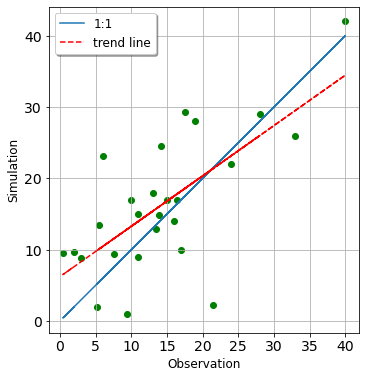

In [16]:
pt.figure(figsize= (6,6))
pt.grid()
pt.gca().set_aspect("equal")

pt.scatter(obs,sim, color='g')
pt.plot(obs,obs,label = '1:1')

z = np.polyfit(obs,sim,1)
p = np.poly1d(z)
pt.plot(obs,p(obs),"r--",label='trend line')

pt.xlabel("Observation", fontsize='large')
pt.ylabel("Simulation", fontsize='large')
pt.legend(loc='best')

pt.legend(loc='best',shadow=True, fontsize='large')
pt.xticks(fontsize=14)
pt.yticks(fontsize=14)

In [17]:
print(type(sample['Date']))
sample['Date'] = pd.to_datetime(sample['Date'])
print(type(sample['Date']))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

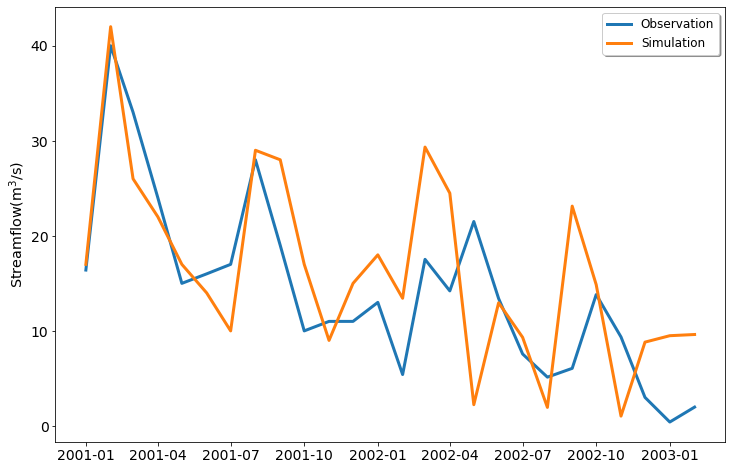

In [18]:
sample_data =  pd.read_excel('sample.xlsx',sheet_name='Sheet1', engine='openpyxl')

# sns.scatterplot(x='obs',y='sim',data=sample_data)
# line, ax = pt.subplots()
# ax = 
pt.figure(figsize= (12,8))
sns.lineplot(x='Date',y='obs',data=sample_data,label = "Observation",linewidth=3)
sns.lineplot(x='Date',y='sim',data=sample_data, label = 'Simulation',linewidth=3)
pt.xlabel("")
pt.ylabel("Streamflow(m$^3$/s)", fontsize='x-large')
pt.legend(loc='best',shadow=True, fontsize='large')
pt.xticks(fontsize=14)
pt.yticks(fontsize=14)